# Simple Linear Regression

---
## Learning Objectives:

- To be able to perform a simple linear regression using appropriate computational tools.


- To be able to extract fitting parameters from scipy.stats.linregress.


- To be able to use OriginPro for statistical analysis including linear regression.

---
## Overview

This week you will be introduced to computational tools that allow us to perform our regression analysis without the need of cumbersome manual calculation. We will use Python and OriginPro. OriginPro is a piece of software that allows us to perform complete statistical analysis on a given data set. It is an incredibly powerful tool capable of performing all of the same statistical calculations as Python, but with the added advantage of providing an incredibly user-friendly experience. 

---
## Simple Linear Regression using Python

The simplest linear regression is…. a simple linear regression. This is what we did last week and is the term used to describe a linear regression where we either assume that there are no errors associated with our data points, or that the weighting of the errors is the same for each data point (homoscedasticity). 

To quickly perform the same calculations we did last week in our manual regression, we can use the linregress function from the scipy.stats package in Python. The linregress function will not only return the intercept and gradient of the line of best fit for a given data set, but will also return the standard errors associated with the intercept and gradient and the Pearson's correlation coefficient. 

The Pearson correlation coefficient, r, can take on any value between -1 and 1, and is a measure of the strength of the correlation between two variables. If the correlation coefficient is equal to -1, this is indicative of a strong negative correlation, whereas a correlation coefficient equal to 1 is indicative of a strong positive correlation. If there is no correlation the value will be equal to 0. A value between 0 and -1 or 0 and 1 indicates that there is a correlation, the strength of which is indicated by the magnitude of the value. 

You can calculate the Pearson correlation coefficient yourself using the following formula:

\begin{equation}
r = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2} \cdot \sum{(y_i - \bar{y})^2}}
\end{equation}

where $x_i$ is a given value of $x$, $\bar{x}$ is the mean value of $x$, $y_i$ is a given value of $y$, and $\bar{y}$ is the mean value of $y$.

![image](Wk4_Figures/Correlation_Coefficient.png)

The plot above shows 4 different data sets. The upper-left data set has a correlation coefficient of 0.9997 and the lower-left data set has a correlation coefficient of -0.9996. This is expected as they clearly show strong positive and negative correlations, respectively. The upper-right data set has a correlation coefficient of 0.9375, which indicates that there is a positive correlation, but one that is not as strong as that shown in the upper-left plot. Finally, the lower-right plot has a correlation coefficient of -0.0554, which is indicative of a very weak negative correlation. 

If we square the Pearson correlation coefficient, we obtain the Coefficient of Determination, R2, often called the R-squared value. R2 may take on a value between 0 and 1 and is a measure of how well the model used to describe a data set is at predicting an outcome. An R2 value equal to 1 means that the model is able to perfectly predict any given value of y from any given value of x, whereas an R2 value equal to 0 means that the model cannot predict an outcome. Naturally, a value closer to 1 is better. 

Now that we understand what the correlation coefficient tells us, let’s do some fitting! 

In [2]:
import numpy as np

# First, let's define some random x,y data. 
xData = np.linspace(0,100, 11)
yData = np.linspace(0, 300, 11) + np.random.randint(30, size = 11)

In [3]:
# Next, we import linregress
from scipy.stats import linregress

# Now we can fit the data. 
results = linregress(xData, yData)

In [4]:
# Lets print our results:
print("The gradient of the line of best fit is: ", '%.3f' % results.slope, " +\- ", '%.3f' % results.stderr, '\n') # slope = gradient, stderr = standard error of gradient

print("The intercept of the line of best fit is: ", '%.3f' % results.intercept, " +\- ", '%.3f' % results.intercept_stderr, '\n')# intercept = intercept, intercept_stderr = standard error of intercept

print("The Pearsons correlation coefficient is: ", results.rvalue) # rvalue = Pearson correlation coefficient.

# The '%.3f' % term above is simply used to tell the computer that we only want the results printed 
# to the first three decimal places (for improved readability)


The gradient of the line of best fit is:  3.036  +\-  0.071 

The intercept of the line of best fit is:  13.727  +\-  4.188 

The Pearsons correlation coefficient is:  0.9975626351741675


It only takes one line of code to fit a simple linear regression to our data! Once the gradient and intercept of the line of best fit have been determined, we can plot our line of best fit using $y= mx +c$:

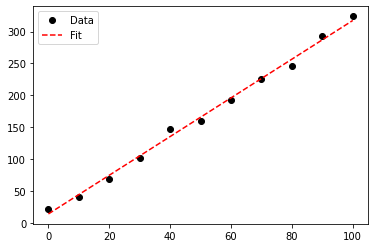

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the line of best fit using our xData and calculated gradient and intercept:
plt.plot(xData, yData, marker = 'o', linestyle = ' ', color = 'k', label = 'Data')
plt.plot(xData, results.slope * xData + results.intercept, marker = ' ', linestyle = '--', color = 'r', label = 'Fit')
plt.legend()
plt.show()

---
## Simple Linear Regression using OriginPro

Before we learn how to perform a linear regression using OriginPro, I should note that this software requires a licence to use. The university does have a limited number of licences to use, however it is recommended that you should access OriginPro on a suitable university computer (e.g. the lab PC’s). 

A second point to note is that OriginPro cannot natively be run on MacOS and instead requires the user to setup and use a “virtual machine” or partition their hard-drive and install windows onto their mac. I do not recommend you use either of these options. This simply highlights why so many scientists use Python - it is open source and universal. 

1. To begin using OriginPro on a university computer, search for OriginPro in the Windows search bar and open OriginPro 2019 (64 Bit). You will be greeted with a range of options of the workbook you wish to use - select “Blank Workbook”:

   ![image](Wk4_Figures/OriginPro1.png)
   
   
2. Once you have opened the blank workbook, you should see the following:

 ![image](Wk4_Figures/OriginPro2.png)
 
 
The rows and columns of cells are where we will enter our x and y data. If we had multiple values of y for any given value of x, we could add additional columns to the book. You should enter the names and units of the x/y variables in the appropriate cells.
    

3. Next, we will fill the cells with our x and y values. We could do this manually, however it is often more convenient to simply import the data from an appropriate file type e.g. a csv file. 

    To import data, from the toolbar select “Data” >> “Import from file” >> “CSV”, and then browse your local computer to find the appropriate CSV file. OriginPro will then read the CSV file and fill the empty cells.

![image](Wk4_Figures/OriginPro3.png) 

4. Once our data has been imported, we can perform analysis using it. To perform a simple linear regression simply highlight the data in book 1 and in the toolbar select “Analysis” >> “Fitting” >> “Linear Fit”. 

    The default options provided as you navigate the fitting options should be appropriate, however you are free to edit the default selection if needed.
    
![image](Wk4_Figures/OriginPro4.png)

5. Finally, we can perform our fit and see our results. All of the fitting results are provided in the “Parameters” and “Statistics” tables. You can better visualise and edit the plot produced by clicking on the plot preview. 

![image](Wk4_Figures/OriginPro5.png)

6. The information from OriginPro may then be used to produce a high quality plot. For the exercises below, I would suggest that you play around with the style options in OriginPro, but use the information it outputs to make a high quality plot using Python.

---
## Activities

**Linear Regression using Computational Tools**

For this activity you are tasked with performing simple linear regressions using computational methods for the four data sets provided. Please do the following:

1. Fit Data1 and Data2 using the linregress function in Python. 


2. Fit Data3 and Data4 using OriginPro. You can download these data sets to your local computer from CoCalc.


3. Extract your fit parameters from both methods and produce a series of high quality plots using Python. You may wish to create your plots such that they are contained within a single figure using subplots.


4. Comment on the fits and their quality: consider the errors associated with each extracted parameter, the Pearson correlation coefficient and the coefficient of determination.

Ensure that the fit parameters and associated statistics from each fit are noted (e.g. printed as a string) so that they may be checked. 

In [1]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [ ]:
# Task 1: Linear Regression using Python

# Import the csv data

# Perform linear regression on "Data1" and "Data2"

# Extract fitting parameters.

In [ ]:
# Task 2: Linear Regression using OriginPro

# Save the fit parameters determined in OriginPro as variables here.

In [ ]:
# Task 3: Produce high quality plots.

---
## Free Session

You may use the reminder of this session as you see fit. I recommend that you take this time to review the content we have covered so far, complete any outstanding tasks from previous weeks and seek support from either the academic staff or GTA’s on any topics you do not yet feel comfortable with. 